## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [6]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv',
                  sep = ',')
data.to_csv('excel.csv')

In [7]:
data.shape

(1000, 21)

In [8]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [9]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [10]:
data.isnull().any().any()

False

In [11]:
# status - порядковый, так как даны упорядоченные числовые показатели (no checking account можно представить как 0)
# duration - количественный
# credit_history - категориальный
# purpose - категориальный
# amount - количественный
# savings - порядковый, так как даны упорядоченные числовые показатели (unknown/no account можно представить как 0)
# employment_duration - порядковый, так как даны упорядоченные числовые показатели (unemployed можно предсавить как 0)
# installment_rate - порядковый, так как даны упорядоченные числовые показатели
# personal_status_sex - категориальный
# other_debtors - категориальный
# present_residence - порядковый, так как даны упорядоченные числовые показатели
# property - категориальный
# age - количественный
# other_installment_plans - категориальный
# housing - категориальный
# number_credits - порядковый
# job - категориальны
# people_liable - порядковый, так как даны упорядоченные числовые показатели
# telephone - бинарный, только два противоположных значения
# foreign_worker - бинарный, только два противоположных значения
# credit_risk - бинарный, только два противоположных значения

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [12]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [13]:
print(len(data[(data['age'] < 30) & (data['housing'] == 'rent')]) / len(data[data['age'] < 30]) * 100)

66.66666666666666


In [14]:
print(len(data[(data['age'] > 40) & (data['housing'] == 'rent')]) / len(data[data['age'] > 40]) * 100)

68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [15]:
#первый способ
print(len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'] == '4-5')]) + len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'] == '>=6')]))

1


In [16]:
#второй способ
print(sum((data['foreign_worker'] == 'yes') & (data['number_credits'] == '4-5')) + sum((data['foreign_worker'] == 'yes') & (data['number_credits'] == '>= 6')))

1


### Задание 6 (1 балл)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

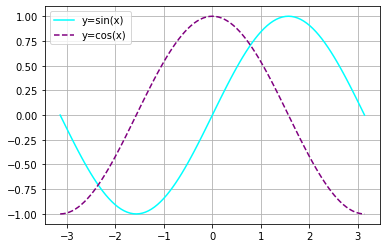

In [18]:
x = np.linspace(-1.0*np.pi, 1.0*np.pi, 101)
ysin = np.sin(x)
ycos = np.cos(x)

plt.plot(x, ysin, label = "y=sin(x)", color = 'cyan')
plt.plot(x, ycos, '--', label = "y=cos(x)", color = 'purple')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

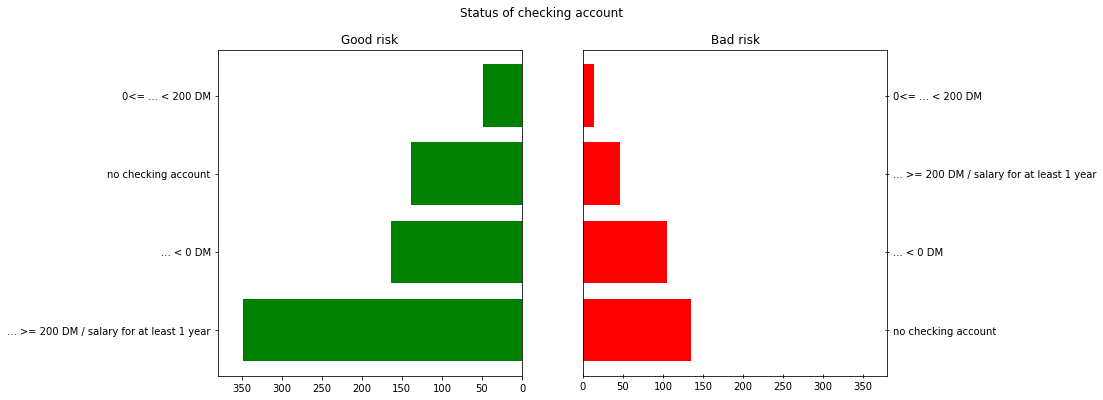

In [19]:
#Задачу можно решить двумя способами - с помощью barplot и гистограммы. Этот фрагмент кода - barplot
newdata1 = data.loc[data['credit_risk'] == 'good']
status1 = newdata1['status'].value_counts()
newdata2 = data.loc[data['credit_risk'] == 'bad']
status2 = newdata2['status'].value_counts()

fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].barh(y=status1.index, width=status1, color='g')
axs[1].barh(y=status2.index, width=status2, color = 'r')
axs[0].set_title('Good risk')
axs[1].set_title('Bad risk')
axs[0].set_xlim([0, 380])
axs[1].set_xlim([0, 380])
axs[0].invert_xaxis()

plt.tick_params(axis = 'both', left = False, right = True, direction = 'inout', which = 'major', labelright = True, labelleft = False)
fig.suptitle('Status of checking account')
plt.show()

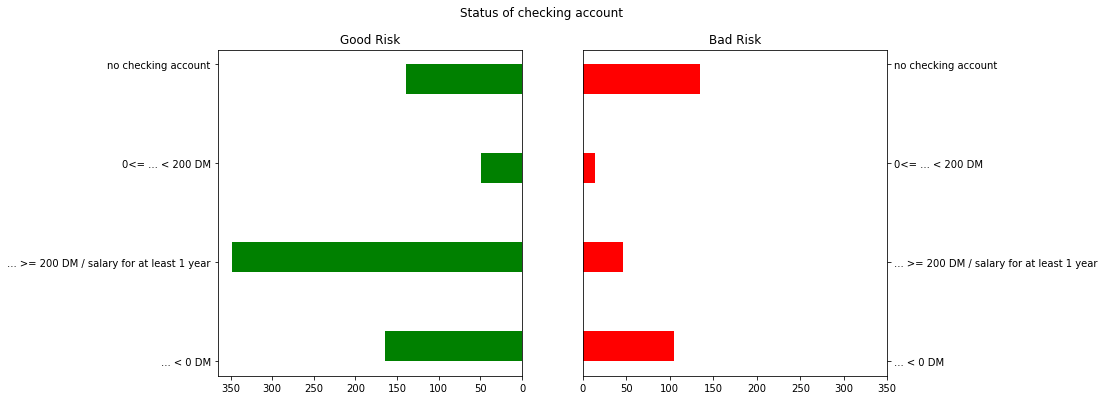

In [20]:
#Гистограмма
data_good = data.loc[data['credit_risk'] == 'good']
data_bad = data.loc[data['credit_risk'] == 'bad']
 
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].hist(sorted(data_good['status']), color = 'g', orientation = 'horizontal')
ax[0].invert_xaxis()
ax[1].hist(sorted(data_bad['status']), color = 'r', orientation = 'horizontal')
ax[1].set_xlim([0, 350])
ax[1].yaxis.tick_right()
ax[0].set_title('Good Risk')
ax[1].set_title('Bad Risk')
 
fig.suptitle('Status of checking account')
plt.show()

In [21]:
# Интерпретация
# Большой размер текущего счета более сопряжен с порложительным кейсом, чем маленький размер текущего счета.
# При этом отсутствие счета приводит как к положительным, так и отрицательным кейсам с одинаковой вероятностью.
# Самое большое число отрицательных кейсов без учета отсутствия счета - при маленьком размере счета.


### Задание 8  (0.5 балла)

In [22]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

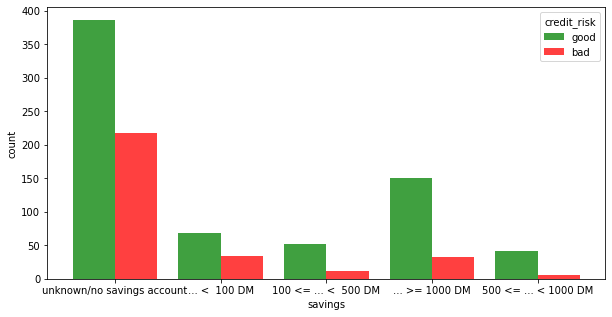

In [23]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = data, x = 'savings', hue = 'credit_risk', multiple = 'dodge', shrink=.8, palette = ['g', 'r'], linewidth=0)
ax.set(xlabel='savings', ylabel='count')
plt.show()

#Seaborn лучше во всех отношениях - намного менее требовательный и длинный код вместе с легко интерпретируемыми результатами (по крайней мере, нет сильной разницы с предыдущими графиками)

In [24]:
# Интерпретация
# Увеличение размера сберегательного счета скорее сопряжено с уменьшением отрицательных кейсов и увеличением положительных.
# Однако и с отсутствием подобного счета наблюдается превалирование положительных кейсов. Тут стоит обратить внимание на то,
# что при отсутствии сберегательного счета число отрицательных кейсов кратно выше, чем при его наличии и увеличении размера.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

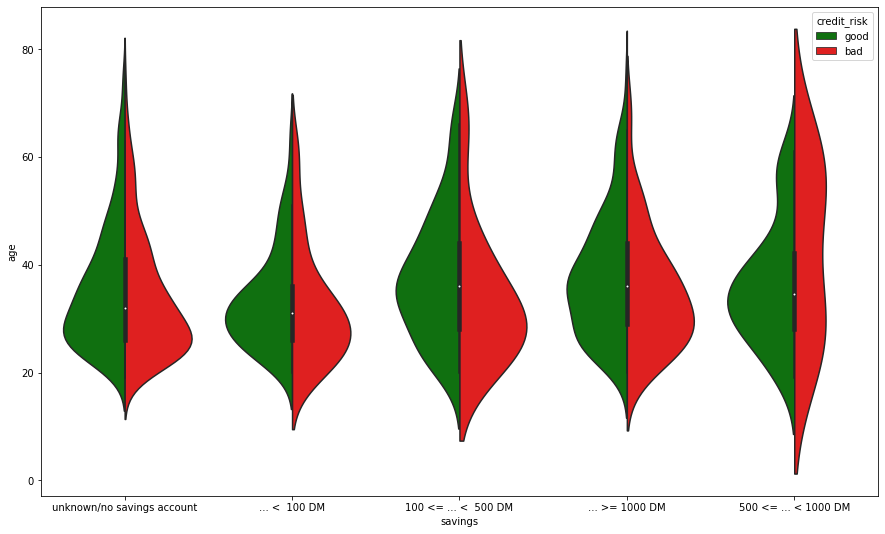

In [25]:
plt.figure(figsize=(15,9))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split = True, palette = ['green', 'r'])
plt.show()

In [26]:
# Интерпретация
# Отрицательные кейсы при отсутствиии счета характерны для более молодых - когорты 20-22 лет. Положительные кейсы при
# отсутствии счета наблюдаются у когорты 25-27 лет + небольшая группа пожилых.

# Малый размер счета (положительный кейс) сильно сконцентрирован у возрастной группы около 25-27 лет, а также немного у группы в 50 лет.
# Малый размер счета (отрицательный кейс) тоже сильно сконцентрирован, но для чуть более молодых людей.

# Средний размер (положительный кейс) счета сконцентирован у возрстной группы чуть старше предыдущих, стремится к 40 годам.
# Средний размер счета (отрицательный кейс) сконцентрирован у возрастной группы той же, что и предыдущей.

# При высоких размерах счета и положительных кейсах все сильнее выражается пожилая группа и группы 30-40 лет, когда капитал
# уже накоплен. При этом при максимальных размерах счета отрицательные кейсы не находят возрастной концентрации.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

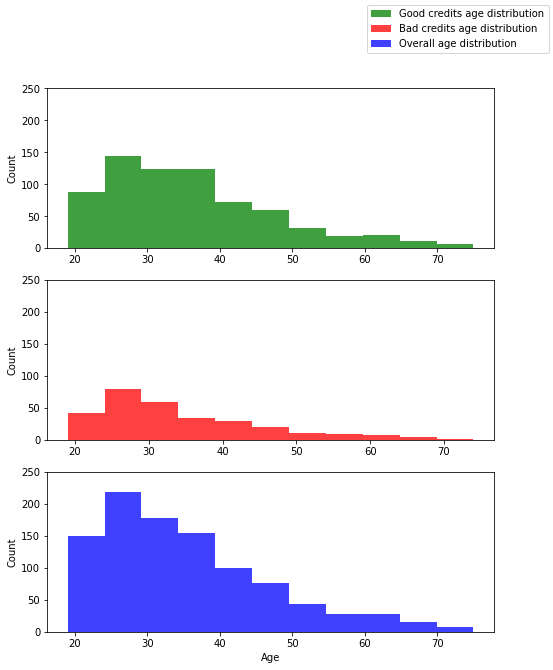

<Figure size 360x720 with 0 Axes>

In [27]:
f, ax = plt.subplots(3,1, figsize=(8, 10))
sns.histplot(data = newdata1, x = 'age', color = 'g', linewidth=0, ax = ax[0], bins = 11)
sns.histplot(data = newdata2, x = 'age', color = 'r', linewidth=0, ax = ax[1], bins = 11)
sns.histplot(data = data, x = 'age', color = 'b', linewidth=0, ax = ax[2], bins = 11)
ax[0].set_ylim([0, 250])
ax[1].set_ylim([0, 250])
ax[2].set_ylim([0, 250])

plt.figure(figsize=(5,10))
plt.setp(ax[0], xlabel='')
plt.setp(ax[1], xlabel='')
plt.setp(ax[2], xlabel='Age')
f.legend(labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])
plt.show()

In [25]:
# Интерпретация
# Распределение возрастов в зависимости от удачности кейса не сильно зависит (положительных кейсов лишь больше в возрастах 30-40 лет)
# от общего возрастного распределения, которое сконцентрировано у когорты 25-30 лет, а потом постепенно убывает. 


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

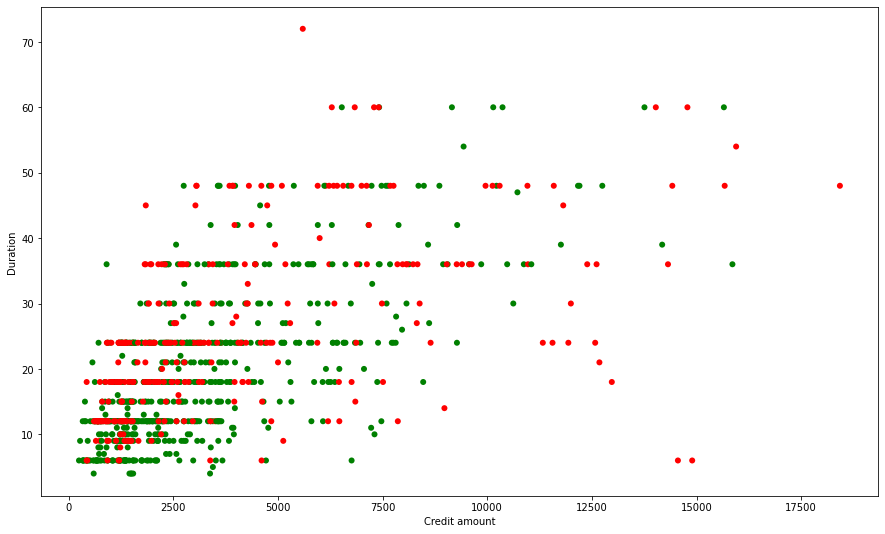

In [28]:
plt.figure(figsize=(15,9))
sns.scatterplot(data = data, x = 'amount', y = 'duration', hue = 'credit_risk', palette = ['g', 'r'], legend = None, linewidth = 0)
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()


In [29]:
# Интерпретация
# Продолжительность и размер кредитов сильно скоррелированы. При больших размерах кредита, но малой длительности наблюдаются
# выбросы в распределении, которые являются отрицательными кейсами. А так в целом фактор удачности или провальности кейса
# не сильно влияет на распределение данных.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

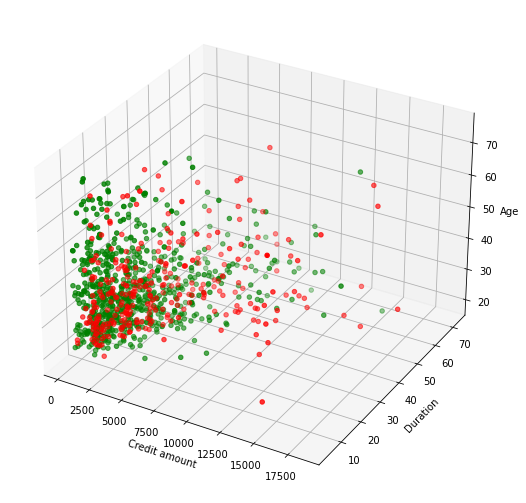

In [30]:
fig = plt.figure(figsize=(15,9))
ax_3d = fig.add_subplot(111, projection = '3d')
ax_3d.set_xlabel('Credit amount')
ax_3d.set_ylabel('Duration')
ax_3d.set_zlabel('Age')
ax_3d.scatter(newdata1['amount'], newdata1['duration'], newdata1['age'], edgecolor=None, linewidth = 1, color = 'g')
ax_3d.scatter(newdata2['amount'], newdata2['duration'], newdata2['age'], edgecolor=None, linewidth = 1, color = 'r')
plt.show()

In [31]:
# Интерпретация

# Сохраняются примерно те же зависимости, что и на предыдущем графике, однако стоит отметить, что возрастные люди с большим
# объемом кредита и высокой длительностью с очень большой вероятностью получают отрицательный кейс. При этом фактор возраста
# не сильно влияет на появление отрицательных кейсов, если размер кредита невелик, а длительность его низкая наблюдаются
# скорее положительные кейсы.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [32]:
from sklearn.preprocessing import LabelEncoder

data2 = pd.get_dummies(data, columns=['telephone', 'foreign_worker', 'credit_risk'], drop_first=True)

label = LabelEncoder()
data2.drop(columns = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], axis = 1, inplace = True) 

data2['status']= label.fit_transform(data2['status'])
data2['savings']= label.fit_transform(data2['savings'])
data2['employment_duration']= label.fit_transform(data2['employment_duration'])
data2['installment_rate']= label.fit_transform(data2['installment_rate'])
data2['present_residence']= label.fit_transform(data2['present_residence'])
data2['number_credits']= label.fit_transform(data2['number_credits'])
data2['people_liable']= label.fit_transform(data2['people_liable'])

data2.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone_yes (under customer name),foreign_worker_yes,credit_risk_good
0,3,18,1049,4,2,2,3,21,0,0,0,0,1
1,3,9,2799,4,0,1,0,36,1,1,0,0,1
2,0,12,841,0,1,1,3,23,0,0,0,0,1
3,3,12,2122,4,0,0,0,39,1,1,0,1,1
4,3,12,2171,4,0,2,3,38,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [33]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def predict(Xtest: np.array) -> np.array:
    Xtest = np.matrix(Xtest)
    Xtest = Xtest.sum(axis = 1)
    return np.where(Xtest < 0, 1, 0)

X = data2.drop('credit_risk_good', 1).values
y = data2['credit_risk_good'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

normalizer = preprocessing.MinMaxScaler(feature_range=(-1,1))
normalizer.fit(X_train)
X_test = normalizer.transform(X_test)

print(f'Accuracy score is: {accuracy_score(y_test, predict(X_test))}')

Accuracy score is: 0.652


C:\Users\manin\AppData\Local\Temp\ipykernel_13548\3120975262.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data2.drop('credit_risk_good', 1).values
